In [1]:
# Import used for processing data and data analysis
import pandas as pd

# Import used for file path functions
import os

# Import used for splicing file names
import re

# Imports used for GUI
import tkinter as tk
from tkinter import ttk

# Imports used for graph plotting
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

# Import for calculating probability
import scipy.stats as stats

In [2]:
# Method to open main menu
def main_menu():
    
    # Method call to clear any existing items from GUI 
    clear_grid()
    
    # Label with instructions to user
    ttk.Label(root, text='Select a function:', font=('Arial',18), width=15, padding=10).grid(row=2, column=1, sticky='NSEW')
    
    # Buttons to call method for submenus for each function
    ttk.Button(root, text='Import data', command=import_menu, width=15, padding=2).grid(row=3, column=1, sticky='NSEW')   
    ttk.Button(root, text='Save data', command=save_menu, width=15, padding=2).grid(row=4, column=1, sticky='NSEW')   
    ttk.Button(root, text='Load data', command=load_menu, width=15, padding=2).grid(row=5, column=1, sticky='NSEW')  
    ttk.Button(root, text='Data analysis', command=data_analysis_menu, width=15, padding=2).grid(row=6, column=1, sticky='NSEW')  
    
    # Button to call method to terminate program
    ttk.Button(root, text='Exit', command=exit, width=15, padding=10).grid(row=7, column=1, sticky='NSEW')
    
    # Initialising root
    root.mainloop()

In [3]:
# Method to open import menu
def import_menu():
    
    # Method call to clear any existing items from GUI 
    clear_grid()
    
    # Label with import instructions to user
    ttk.Label(root, text='Enter the name of the folder the data is stored in:', wraplength=150, font=('Arial',16), width=15, padding=10).grid(row = 2, column=1, sticky='NSEW')
    
    # Creating and initialising global variable to store user input
    global text 
    text = tk.StringVar('')
    
    # Creating text field for user input
    ttk.Entry(root, textvariable=text).grid(row=3, column=1, sticky='NSEW')
    
    # Buttons to call method to submit text in text field or return to main menu
    ttk.Button(root, text='Submit', command=import_data, width=15, padding=2).grid(row=4, column=1, sticky='NSEW')
    ttk.Button(root, text='Main menu', command=main_menu, width=15, padding=10).grid(row=5, column=1, sticky='NSEW')
    
    # Initialising root
    root.mainloop()

In [4]:
# Method to open save menu
def save_menu():
    
    # Method call to clear any existing items from GUI 
    clear_grid()
    
    # Label with save instructions to user
    ttk.Label(root, text='Enter the name of the folder you want to save the files to:', wraplength=150, font=('Arial',16), width=15, padding=10).grid(row = 2, column=1, sticky='NSEW')
    
    # Creating and initialising global variable to store user input
    global text
    text = tk.StringVar('')
    
    # Creating text field for user input
    ttk.Entry(root, textvariable=text).grid(row=3, column=1, sticky='NSEW')
    
    # Buttons to call method to submit text in text field or return to main menu
    ttk.Button(root, text='Submit', command=save_data, width=15, padding=2).grid(row=4, column=1, sticky='NSEW')
    ttk.Button(root, text='Main menu', command=main_menu, width=15, padding=10).grid(row=5, column=1, sticky='NSEW')
    
    # Initialising root
    root.mainloop()

In [5]:
# Method to open load menu
def load_menu():
    
    # Method call to clear any existing items from GUI 
    clear_grid()
    
    # Label with load instructions to user
    ttk.Label(root, text='Enter the name of the folder the files are stored in:', wraplength=150, font=('Arial',16), width=15, padding=10).grid(row = 2, column=1, sticky='NSEW')
    
    # Creating and initialising global variable to store user input    
    global text 
    text = tk.StringVar('')
    
    # Creating text field for user input
    ttk.Entry(root, textvariable=text).grid(row=3, column=1, sticky='NSEW')
    
    # Buttons to call method to submit text in text field or return to main menu
    ttk.Button(root, text='Submit', command=load_data, width=15, padding=2).grid(row=4, column=1, sticky='NSEW')
    ttk.Button(root, text='Main menu', command=main_menu, width=15, padding=10).grid(row=5, column=1, sticky='NSEW')
    
    # Initialising root
    root.mainloop()

In [6]:
# Method to open data analysis menu
def data_analysis_menu():
    
    # Method call to clear any existing items from GUI 
    clear_grid()
    
    # Label with load instructions to user
    ttk.Label(root, text='Select a function:', wraplength=150, font=('Arial',16), width=22, padding=10).grid(row = 2, column=1, sticky='NSEW')
    
    # Creating and initialising global variable to store user input
    global text 
    text = tk.StringVar('')
    
    # Buttons to call method for data analysis functions or return to main menu
    ttk.Button(root, text='Frequency stats for large airports', command=data_analysis, width=22, padding=2).grid(row=3, column=1, sticky='NSEW')
    ttk.Button(root, text='Small airport frequencies graph', command=plot_small_freq, width=22, padding=2).grid(row=4, column=1, sticky='NSEW')
    ttk.Button(root, text='Graph comparing frequencies', command=freq_plot, width=22, padding=2).grid(row=5, column=1, sticky='NSEW')
    ttk.Button(root, text='Stats comparing frequencies', command=freq_stats, width=22, padding=2).grid(row=6, column=1, sticky='NSEW')
    ttk.Button(root, text='Probability', command=p_value, width=22, padding=2).grid(row=7, column=1, sticky='NSEW')
    ttk.Button(root, text='Main menu', command=main_menu, width=22, padding=10).grid(row=8, column=1, sticky='NSEW')
    
    # Initialising root
    root.mainloop()

In [7]:
# Default method to produce popup window with string text from parameter
def popup_window(message):
    
    # Creating popup window and setting dimensions
    popup = tk.Toplevel()
    popup.geometry("250x250")

    # Configuring popup window to ensure widgets are centred within GUI
    popup.rowconfigure(0, weight=1)
    popup.rowconfigure(3, weight=1)
    popup.columnconfigure(0, weight=1)
    popup.columnconfigure(3, weight=1)
    
    # Creating label with update for user based on paramter of method
    tk.Label(popup, text=f"{message}", font=('Arial',14), wraplength=150).grid(row=1, column=1)

    # Button to dismiss popup window
    ttk.Button(popup, text="OK", command=popup.destroy).grid(row=2, column=1)

In [8]:
# Method called to clear the UI for menu changes
def clear_grid():
    
    # Looping through all widgets in grid
    for widget in root.grid_slaves():
        
        # Deleting widget from grid
        widget.destroy()

In [9]:
# Method to import CSV file
def import_data():
    
    # Store folder name entered by user in text field on import_menu
    folder = text.get()
    
    # Reset text field to empty
    text.set('')
    
    # Create list of expected csv files
    files = {'airports.csv','runways.csv','airport-frequencies.csv'}
    
    # Catches potential error where all required files are not present
    try:     
        
        # Looping through list of files
        for file in files:
            
            # Loading csv data to DataFrame
            df = pd.read_csv(f"{folder}/{file}")
        
            # Storing data in a dictionary
            file_name = re.split(".csv",file)
            file_name = file_name[0]
            
            # Updating dictionary of loaded files with dictionary object containing file name and DataFrame
            loaded_data.update({file_name: df})
        
        # Catches potential error caused by imported files not containing necessary information
        try:
            
            # Creating DataFrame of airports data stored within loaded_data dictionary
            df1 = loaded_data['airports']
            
            # Creating DataFrame of all airports where type is 'closed'
            closed = df1.loc[df1['type'] == 'closed']
            
            # Creating series of IDs for all 'closed' airports
            closed = closed['id']

            # Creating DataFrame of runways and airports-frequencies data stored within loaded_data set
            df2 = loaded_data['runways']
            df3 = loaded_data['airport-frequencies']
            
            # Creating DataFrame containing runways and airport-frequencies data where airport_ref is not in series of 'closed' airports
            df2 = df2[df2.airport_ref.isin(closed) == False]
            df3 = df3[df3.airport_ref.isin(closed) == False]
            
            # Deleting all closed aiprorts from airports data
            df1.drop(df1.index[df1['type'] == 'closed'], inplace=True)
            
            # Updating loaded_data set with updated DataFrames
            loaded_data['airports'] = df1
            loaded_data['runways'] = df2
            loaded_data['airport-frequencies'] = df3
            
            # Call to popup_window method to advise user that data has been successfully loaded  
            popup_window(f'{files} successfully loaded.')
        
            # Method call to return to main menu
            main_menu()
        
        # Runs if issues cleaning data
        except:
           
            # Call to pop_window method advising that the files were loaded but data could not be processed
            popup_window(f'Error: Files loaded from "{folder}" but unable to process data. Please ensure files use recognised headings and try again.')
    
    # Runs if airports, runways or airport-frequencies files could not be found 
    except FileNotFoundError:
        
        # Advises user that all files could not be located in the specified foler
        popup_window(f'Error: Could not locate all required files in "{folder}" folder. Please ensure airports, runways and airport-frequencies files are saved and try again.')

In [10]:
# Method to save data
def save_data():
    
    # Store folder name entered by user in text field on save_menu
    folder = text.get()
    
    # Reset text field to empty
    text.set('')
    
    # Runs if no folder name entered
    if folder == '':
        
        # Call to popup_window advising user that they must enter a folder name
        popup_window(f'Error: Please enter a folder name and try again.')
    
    # Runs if folder name entered
    else:
        
        # Checks if the folder already exists
        if not os.path.exists(folder):
            
            # Creates folder if it doesn't exist
            os.mkdir(folder)

        # Creates list of saved file names
        saved_files = []

        # Iterating through load_data dictionary items
        for key, df in loaded_data.items():

            # Saving each dataframe as .json file
            df.to_json(f"{folder}/{key}.json", orient='index', indent=2)
            
            # Add name of saved files to saved_files list
            saved_files.append(key)

        # Call to popup_window method advising of the silves that were saved and folder name
        popup_window(f'{saved_files} files saved in \"{folder}\".')
        
        # Method call to return to main menu
        main_menu()

In [11]:
# Method to load data previously saved
def load_data():
    
    # Store folder name entered by user in text field on load_menu
    folder = text.get()
    
    # Reset text field to empty
    text.set('')
    
    # Checks if the folder already exists
    if os.path.exists(folder):
    
        # Create list of expected json files
        files = ['airports.json','runways.json','airport-frequencies.json']

        # Creating list to store loaded files
        loaded_files = []

        # Looping through list of expected files        
        for file in files:

            # Catches potential error where all required files are not present
            try:

                # Loading json file to dataframe
                df = pd.read_json(f"{folder}/{file}")
                df = df.swapaxes('index','columns')
                
                # Storing data in a dictionary
                file_name = re.split(".json",file)
                file_name = file_name[0]

                # Adding file name and DataFrame to loaded_data dictionary
                loaded_data.update({file_name: df})
                
                # Adding file name to list of loaded files
                loaded_files.append(file)
            
            # Runs when expected file not present
            except:

                # Goes to next file in list of expected files
                continue

        # Call to popup_window method to advise of files loaded
        popup_window(f'{loaded_files} loaded.')
        
        # Method call to return to main menu
        main_menu()
    
    # Runs if folder entered by user does not exist
    else:
        
        # Call to popup_window method to advise user that folder does not exist
        popup_window(f'Error: \"{folder}\" folder does not exist.')

In [12]:
# Method showing mean, median and mode frequency for large airportss
def data_analysis():
    
    # Only runs if airports and airport-frequencies files have been imported or loaded
    if('airports' in loaded_data.keys() and
       'airport-frequencies' in loaded_data.keys()):
        
        # Catches potential error caused by imported files not containing necessary information
        try:
            
            # Storing airports and airport-frequencies data in new DataFrames so original is not altered
            df1 = loaded_data.get('airports')
            df2 = loaded_data.get('airport-frequencies')

            # Creating new dataframe from only essential columns in airports DataFrame
            data = df1.loc[:,['id','type','iso_country']]

            # Selecting only rows where country is 'GB' and type is 'large_airport'
            data = data.loc[df1['iso_country'] == 'GB']
            data = data.loc[(data['type'] == 'large_airport')]

            # Merging aiports and airport runways DataFrames on 'id' / 'airport_ref' keys
            data = pd.merge(data, df2, left_on='id', right_on='airport_ref')

            # Limiting dataframe to frequencies greater than or equal to 100
            data = data.loc[(data['frequency_mhz'] >= 100)]

            # Generating mean, median and mode
            large_mean = round(data.loc[:,'frequency_mhz'].mean(),4)
            large_median = data.loc[:,'frequency_mhz'].median()
            large_mode = data.loc[:,'frequency_mhz'].mode()
            
            # Turning large_mode into a string if more than one result
            if len(large_mode) > 1:
                
                # Creating string of first number
                string = str(large_mode[0])
                
                # Looping through all numbers
                for i in large_mode:
                    
                    # Ignore first number
                    if i == large_mode[0]:
                        continue
                    # Concatenate remaining number
                    else:
                        string = string + ", " + str(i)
                
                # Final string becomes large_mode
                large_mode = string    

            # Creating popup window and setting dimensions
            popup = tk.Toplevel()
            popup.geometry("500x275")
            
            # Creating tree
            tree = ttk.Treeview(popup)
            
            # Adding DataFrame column names to Tree
            tree["columns"]=('Large Airports')
            tree.column(0, width=100)
            tree.heading(0, text='Large Airports')

            # Adding data
            tree.insert('', index=0, text='Mean', values=large_mean)
            tree.insert('', index=1, text='Median', values=large_median)
            tree.insert('', index=2, text='Mode', values=large_mode)

            # Adding tree to grid    
            tree.grid(column=0, row=0, sticky='NSEW')   

            # Creating button to dismiss graph
            ttk.Button(popup, text='OK', command=popup.destroy, width=15, padding=10).grid(row=1, column=0)
        
        # Runs if issues processing data
        except:
            
            # Call to pop_window method advising that there were issues processing the data
            popup_window("Error: Unable to process data. Please ensure frequency, type and country data is present and columns are correctly labelled.")
    
    # Runs if airports, runways or airport-frequencies files could not be found 
    else:
        
        # Advises user to check that all files haves been loaded
        popup_window("Error: Unable to find necessary data. Please ensure airports and airport-frequencies files have been loaded and try again.")

In [13]:
# Method plotting histogram of frequencies for small aiports 
def plot_small_freq():
    
    # Only runs if airports and airport-frequencies files have been imported or loaded
    if('airports' in loaded_data.keys() and
       'airport-frequencies' in loaded_data.keys()):
        
        # Catches potential error caused by imported files not containing necessary information
        try:
            
            # Creating popup window and setting dimensions
            popup = tk.Toplevel()
            popup.geometry("800x800")
            
            # Allows graph to expand with the screen
            popup.rowconfigure(0,weight=1)
            popup.columnconfigure(0,weight=1)
        
            # Storing airports and airport-frequencies data in new DataFrames so original is not altered
            df1 = loaded_data.get('airports')
            df2 = loaded_data.get('airport-frequencies')
            
            # Creating new dataframe from only essential columns in airports DataFrame
            data = df1.loc[:,['id','type','iso_country']]

            # Selecting only rows where country is 'GB' and type is 'small_airport'
            data = data.loc[df1['iso_country'] == 'GB']
            data = data.loc[(data['type'] == 'small_airport')]
                  
            # Merging aiports and airport runways DataFrames on 'id' / 'airport_ref' keys
            data = pd.merge(data, df2, left_on='id', right_on='airport_ref')
            
            # Cleaning data
            data = data.loc[(data['frequency_mhz'] <= 250)]
            data = data.loc[(data['frequency_mhz'] >= 50)]
            
            # Creating Pandas Series from frequency_mhz column
            values = data['frequency_mhz']
            
            # Creating graph
            fig, ax = plt.subplots()

            # Plotting histogram graph
            ax.hist(values, bins=10, color='steelblue', edgecolor='black', alpha=0.5)
            
            # Labelling y axis, and setting axis limit
            ax.set_xlabel('Frequency')
            ax.set_ylabel('No. of airports')
            ax.set_xlim([100,160])

            # Adding graph to canvas
            canvas_plot = FigureCanvasTkAgg(fig, popup)
            canvas_plot.get_tk_widget().grid(column=0, row=0, sticky='NSEW')          
                                    
            # Creating button to dismiss graph
            ttk.Button(popup, text='OK', command=popup.destroy, width=15, padding=10).grid(row=1, column=0)
         
        # Runs if issues processing data
        except:
            
            # Call to pop_window method advising that there were issues processing the data
            popup_window("Error: Unable to process data. Please ensure frequency, type and country data is present and columns are correctly labelled.")
    
    # Runs if either 'airports' or 'airports-frequencies' files have not been loaded
    else:
        
        # Call to popup_window method to advise user of likely cause of issue
        popup_window("Error: Unable to find necessary data. Please ensure airports and airport-frequencies files have been loaded and try again.")    

In [14]:
# Method plotting density graphs of frequency for small, medium and large airports
def freq_plot():
   
    # Only runs if airports and airport-frequencies files have been imported or loaded
    if('airports' in loaded_data.keys() and
       'airport-frequencies' in loaded_data.keys()):
        
        # Catches potential error caused by imported files not containing necessary information
        try: 
            
            # Creating popup window and setting dimensions
            popup = tk.Toplevel()
            popup.geometry("800x800")

            # Allows graph to expand with the screen
            popup.rowconfigure(0,weight=1)
            popup.columnconfigure(0,weight=1)

            # Storing airports and airport-frequencies data in new DataFrames so original is not altered
            df1 = loaded_data.get('airports')
            df2 = loaded_data.get('airport-frequencies')

            # Creating new dataframe from only essential columns in airports DataFrame
            data = df1.loc[:,['id','type','iso_country']]

            # Selecting only rows where country is 'GB'
            data = data.loc[df1['iso_country'] == 'GB']

            # Merging aiports and airport runways DataFrames on 'id' / 'airport_ref' keys
            data = pd.merge(data, df2, left_on='id', right_on='airport_ref')

            # Cleaning data
            data = data.loc[(data['frequency_mhz'] <= 250)]
            data = data.loc[(data['frequency_mhz'] >= 50)]
            
            # Creating seperate DataFrames for small, medium and large airports
            df_small = data.loc[(data['type_x'] == 'small_airport')]
            df_medium = data.loc[(data['type_x'] == 'medium_airport')]
            df_large = data.loc[(data['type_x'] == 'large_airport')]

            # Creating series of frequency values for each type
            df_small = df_small['frequency_mhz']
            df_medium = df_medium['frequency_mhz']
            df_large = df_large['frequency_mhz']
            
            # Creating graph
            fig, ax = plt.subplots()

            # Plotting density line graph for each type
            df_small.plot(kind='density')      
            df_medium.plot(kind='density')
            df_large.plot(kind='density')

            # Labelling legend and x axis, and setting axis limit
            ax.legend(['Small', 'Medium', 'Large'])
            ax.set_xlabel('Frequency')
            ax.set_xlim([50,200])

            # Creating canvas and adding graph
            canvas_plot = FigureCanvasTkAgg(fig, popup)
            canvas_plot.get_tk_widget().grid(column=0, row=0, sticky='NSEW')          

            # Creating button to dismiss graph
            ttk.Button(popup, text='OK', command=popup.destroy, width=15, padding=10).grid(row=1, column=0)
     
        # Runs if issues processing data
        except:
            
            # Call to pop_window method advising that there were issues processing the data
            popup_window("Error: Unable to process data. Please ensure frequency, type and country data is present and columns are correctly labelled.")
    
    # Runs if either 'airports' or 'airports-frequencies' files have not been loaded
    else:
            # Call to popup_window method to advise user of likely cause of issue
            popup_window("Error: Unable to find necessary data. Please ensure airports and airport-frequencies files have been loaded and try again.")    

In [15]:
# Method showing statistical data on frequency for small, medium and large airports
def freq_stats():
   
    # Only runs if airports and airport-frequencies files have been imported or loaded
    if('airports' in loaded_data.keys() and
       'airport-frequencies' in loaded_data.keys()):
        
        try:
            
            # Storing airports and airport-frequencies data in new DataFrames so original is not altered
            df1 = loaded_data.get('airports')
            df2 = loaded_data.get('airport-frequencies')

            # Creating new dataframe from only essential columns in airports DataFrame
            data = df1.loc[:,['id','type','iso_country']]

            # Selecting only rows where country is 'GB'
            data = data.loc[df1['iso_country'] == 'GB']

            # Merging aiports and airport runways DataFrames on 'id' / 'airport_ref' keys
            data = pd.merge(data, df2, left_on='id', right_on='airport_ref')

            # Cleaning data
            data = data.loc[(data['frequency_mhz'] <= 250)]
            data = data.loc[(data['frequency_mhz'] >= 50)]
            
            # Creating seperate DataFrames for small, medium and large airports
            df_small = data.loc[(data['type_x'] == 'small_airport')]
            df_medium = data.loc[(data['type_x'] == 'medium_airport')]
            df_large = data.loc[(data['type_x'] == 'large_airport')]

            # Creating series of frequency values for each type
            df_small = df_small['frequency_mhz']
            df_medium = df_medium['frequency_mhz']
            df_large = df_large['frequency_mhz']

            # Generating statistical data
            small_stats = df_small.describe()
            medium_stats = df_medium.describe()
            large_stats = df_large.describe()

            # Combining statistics
            stats = pd.concat([small_stats,medium_stats,large_stats], axis=1)

            # Renaming columns
            stats.columns.values[0] = "Small"
            stats.columns.values[1] = "Medium"
            stats.columns.values[2] = "Large"

            # Creating popup window and setting dimensions
            popup = tk.Toplevel()
            popup.geometry("800x350")

            # Allows data to expand with the screen
            popup.rowconfigure(0,weight=1)
            popup.columnconfigure(0,weight=1)
            
            # Creating tree
            tree = ttk.Treeview(popup)

            # Creating list of columns headers
            stats_col = stats.columns.values

            # Adding DataFrame column names to Tree
            tree["columns"]=(stats_col)

            # Number of rows in Stats
            counter = len(stats)

            # Creating list of Stats index
            row_labels = stats.index.tolist()

            # Looping through columns
            for x in range(len(stats_col)):

                # Setting columns width and header
                tree.column(x, width=100)
                tree.heading(x, text=stats_col[x])

            # Looping through rows
            for i in range(counter):

                # Adding Stats values to each row
                tree.insert('', index=i, text=row_labels[i], values=stats.iloc[i,:].tolist())

            # Adding tree to grid    
            tree.grid(column=0, row=0, sticky='NSEW')   

            # Creating button to dismiss graph
            ttk.Button(popup, text='OK', command=popup.destroy, width=15, padding=10).grid(row=1, column=0)
        
        # Runs if issues processing data
        except:
            
            # Call to pop_window method advising that there were issues processing the data
            popup_window("Error: Unable to process data. Please ensure frequency, type and country data is present and columns are correctly labelled.")
    
    # Runs if either 'airports' or 'airports-frequencies' files have not been loaded
    else: 
        # Call to popup_window method to advise user of likely cause of issue
        popup_window("Error: Unable to find necessary data. Please ensure airports and airport-frequencies files have been loaded and try again.")

In [16]:
def p_value():
    
    # Storing airports and airport-frequencies data in new DataFrames so original is not altered
    df1 = loaded_data.get('airports')
    df2 = loaded_data.get('airport-frequencies')
    
    # Creating new dataframe from only essential columns in airports DataFrame
    data = df1.loc[:,['id','type','iso_country']]

    # Selecting only rows where country is 'GB'
    data = data.loc[df1['iso_country'] == 'GB']

    # Merging aiports and airport runways DataFrames on 'id' / 'airport_ref' keys
    data = pd.merge(data, df2, left_on='id', right_on='airport_ref')

    # Cleaning data
    data = data.loc[(data['frequency_mhz'] <= 250)]
    data = data.loc[(data['frequency_mhz'] >= 50)]

    # Creating seperate DataFrames for small, medium and large airports
    df_small = data.loc[(data['type_x'] == 'small_airport')]
    df_medium = data.loc[(data['type_x'] == 'medium_airport')]
    df_large = data.loc[(data['type_x'] == 'large_airport')]

    # Creating series of frequency values for each type
    df_small = df_small['frequency_mhz']
    df_medium = df_medium['frequency_mhz']
    df_large = df_large['frequency_mhz']

    # Calculating p value for DataSets not being linked
    fvalue, pvalue = stats.f_oneway(df_small, df_medium, df_large)

    # Creating popup window and setting dimensions
    popup = tk.Toplevel()
    popup.geometry("500x300")

    # Creating tree
    tree = ttk.Treeview(popup)

    # Adding DataFrame column names to Tree
    tree["columns"]=('Airport Frequencies')
    tree.column(0, width=200)
    tree.heading(0, text='Airport Frequencies')

    # Adding data
    tree.insert('', index=0, text='Probability datasets unrelated', values=pvalue)

    # Adding tree to grid    
    tree.grid(column=0, row=0, sticky='NSEW')   

    # Creating button to dismiss graph
    ttk.Button(popup, text='OK', command=popup.destroy, width=15, padding=10).grid(row=1, column=0)

In [17]:
# Method to exit the program
def exit():
    
    # Terminating root object
    root.destroy()

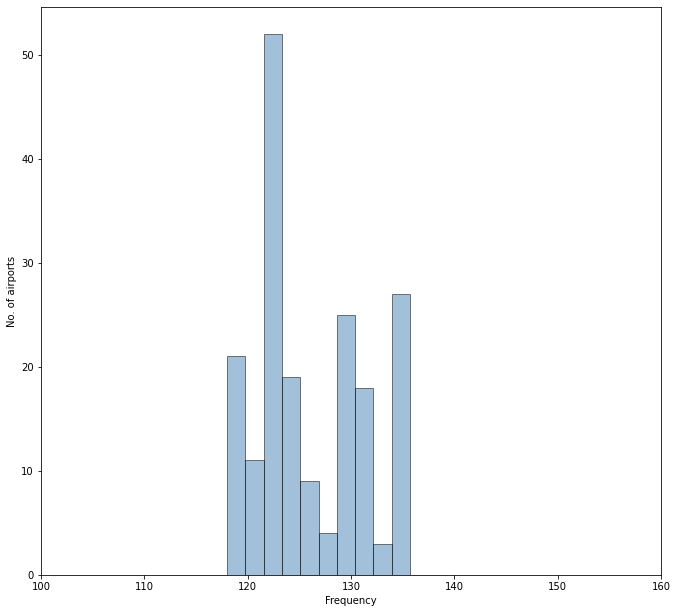

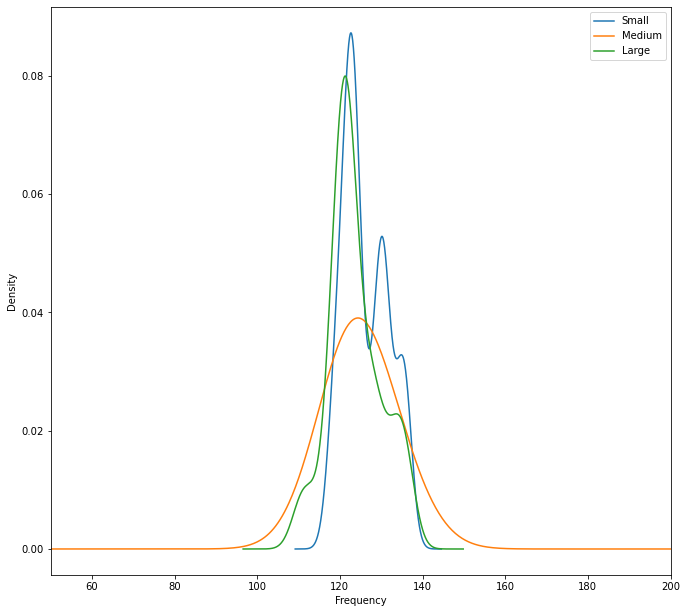

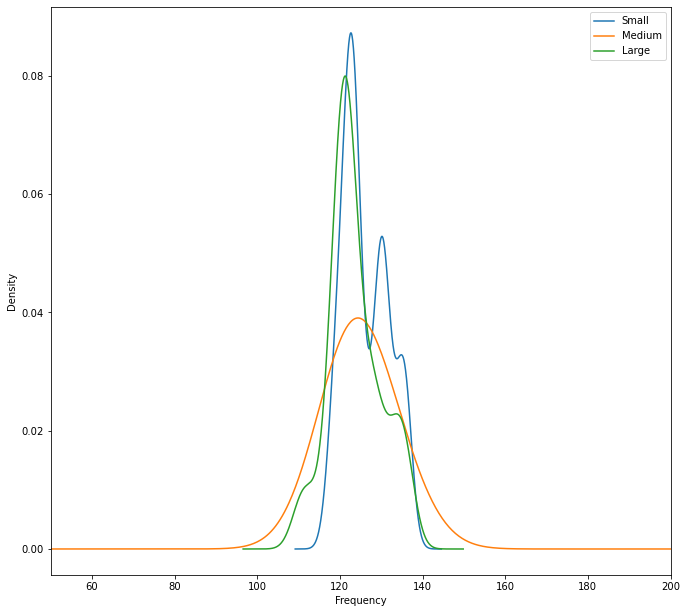

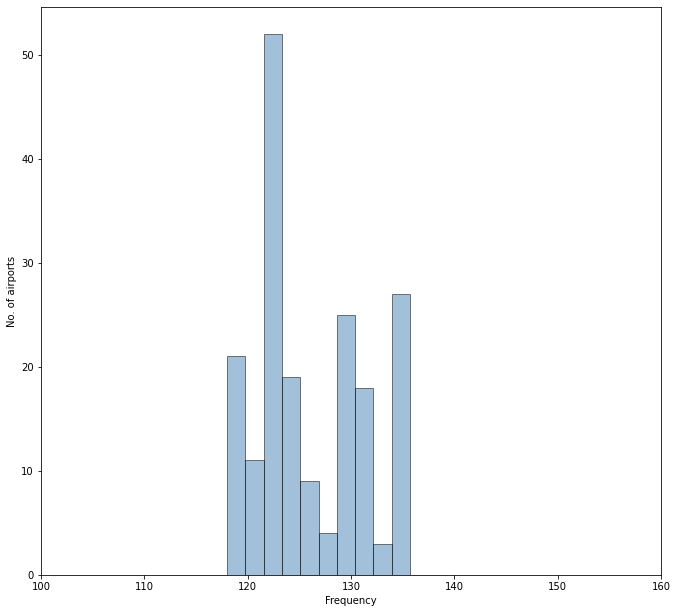

In [18]:
# Dictionary to hold loaded data
loaded_data = {}

# Creating root object for GUI
root = tk.Tk()

# Naming GUI window
root.title("Airport Data")

# Setting dimensions of GUI window
root.geometry("500x500")

# Configuring root to ensure widgets are centred within GUI
root.rowconfigure(0, weight=1)
root.rowconfigure(9, weight=1)
root.columnconfigure(0, weight=1)
root.columnconfigure(3, weight=1)

# Call to main_menu to start program
main_menu()